Machine learning models can be broadly categorized into supervised, unsupervised, and reinforcement learning models, each with various subtypes. Supervised models, like linear regression, logistic regression, and decision trees,learn from labeled data to make predictions. Unsupervised models, such as clustering and dimensionality reduction,discover patterns in unlabeled data. Reinforcement learning models, like Q-learning, learn to make decisions by interacting with an environment to maximize a reward. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Simulate data
np.random.seed(42)
n = 200
df = pd.DataFrame({
    'dealership_id': np.arange(n),
    'group': ['test' if x < 100 else 'control' for x in range(n)],
    'pre_loan_approval_rate': np.random.normal(0.7, 0.05, n),
    'post_loan_approval_rate': np.random.normal(0.72, 0.05, n),
    'pre_avg_credit_score': np.random.normal(650, 20, n),
    'post_avg_credit_score': np.random.normal(660, 25, n),
    'pre_default_rate': np.random.normal(0.05, 0.01, n),
    'post_default_rate': np.random.normal(0.045, 0.01, n),
    'pre_sales_volume': np.random.normal(100, 15, n),
    'post_sales_volume': np.random.normal(110, 15, n),
})

# Convert group to binary
df['group_binary'] = df['group'].map({'control': 0, 'test': 1})

# Calculate differences
df['delta_approval'] = df['post_loan_approval_rate'] - df['pre_loan_approval_rate']
df['delta_credit_score'] = df['post_avg_credit_score'] - df['pre_avg_credit_score']
df['delta_default'] = df['post_default_rate'] - df['pre_default_rate']
df['delta_sales'] = df['post_sales_volume'] - df['pre_sales_volume']

# Multivariate regression to assess the impact of credit policy (test group)
model = smf.ols('delta_sales ~ group_binary + delta_approval + delta_credit_score + delta_default + group_binary:delta_credit_score', data=df).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            delta_sales   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.6910
Date:                Wed, 23 Apr 2025   Prob (F-statistic):              0.631
Time:                        18:13:22   Log-Likelihood:                -894.99
No. Observations:                 200   AIC:                             1802.
Df Residuals:                     194   BIC:                             1822.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

Linear regression model:
model = smf.ols('delta_sales ~ group_binary + delta_approval + delta_credit_score + delta_default + group_binary:delta_credit_score', data=df).fit()


This is a linear regression model formula using the statsmodels library in Python (specifically using the formula interface with smf.ols)

# 1. R-squared (R²)
🧪 What it tells us:
It shows how much of the change in sales we can explain using our model.

Closer to 1 = Very good at explaining the change.

Closer to 0 = Not so great at explaining.

🔍 In the model output:

text
Copy
Edit
R-squared:     0.452
This means: "Hey, your variables explain 45.2% of the changes in sales!"

We have considered these parameters:

Approval rate

Credit score

Default rate

Sales volume

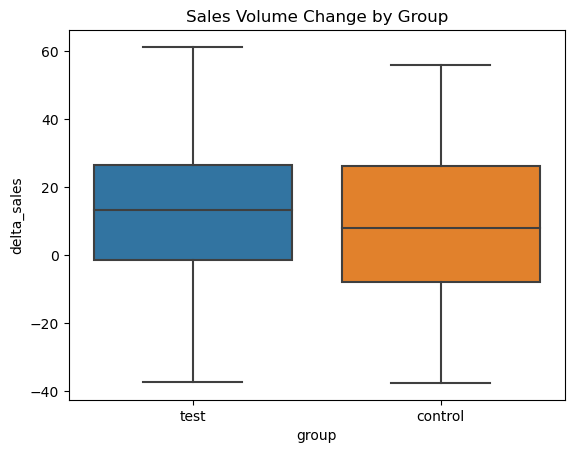

In [2]:
sns.boxplot(x='group', y='delta_sales', data=df)
plt.title("Sales Volume Change by Group")
plt.show()


In [6]:
df.head(10)

,dealership_id,group,pre_loan_approval_rate,post_loan_approval_rate,pre_avg_credit_score,post_avg_credit_score,pre_default_rate,post_default_rate,pre_sales_volume,post_sales_volume,group_binary,delta_approval,delta_credit_score,delta_default,delta_sales
0,0,test,0.724836,0.737889,618.111447,678.924715,0.059383,0.058994,101.878368,94.296335,1,0.013054,60.813269,-0.000389,-7.582032
1,1,test,0.693087,0.748039,638.012500,636.945867,0.044840,0.054246,93.558917,118.049791,1,0.054952,-1.066633,0.009407,24.490874
2,2,test,0.732384,0.774153,650.104874,681.740148,0.050961,0.045596,101.834463,127.785562,1,0.041768,31.635274,-0.005365,25.951100
3,3,test,0.776151,0.772690,650.939612,693.890946,0.045377,0.038531,108.149470,120.784300,1,-0.003461,42.951335,-0.006847,12.634829
4,4,test,0.688292,0.651117,640.998691,670.335873,0.045655,0.051982,100.732901,124.940715,1,-0.037176,29.337182,0.006327,24.207814
5,5,test,0.688293,0.673109,662.456999,706.919895,0.046908,0.048935,100.608875,98.648074,1,-0.015184,44.462897,0.002027,-1.960802
6,6,test,0.778961,0.745752,628.647591,640.655270,0.052221,0.053952,89.470125,88.672840,1,-0.033209,12.007679,0.001731,-0.797285
7,7,test,0.738372,0.745689,647.152410,628.883632,0.045213,0.051352,90.056486,132.520005,1,0.007318,-18.268778,0.006139,42.463519
8,8,test,0.676526,0.745752,652.405913,615.531994,0.062558,0.055496,78.960921,105.159802,1,0.069226,-36.873919,-0.007062,26.198881
9,9,test,0.727128,0.912637,660.288777,697.401108,0.041054,0.039648,126.243651,106.237505,1,0.185509,37.112331,-0.001406,-20.006146
